# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 3  Introduction to Classification and a Data Workflow

Thursday Lab: 9/3/2020 3:15 pm - 4:30 pm

Friday Lab: 9/4/2020 9:25 am - 10:40 am 

## Introduction

A useful library is the os library:

```python
import os
```

This allows you to fetch the current working directory like so:

```python
import os

my_dir = os.getcwd()
```

This is useful when writing code that is built into a specific directory structure such that it is transferable, so as long as data is in the correct directory you can supply filenames instead of absolute paths. Adding a filename and path together to get a complete file path is straight forward in python but make sure you include the leading forward slash with your path name: 

```python
import os

# leading forward slash is included in filename
# as the output of os.getcwd() does not have a trailing forward slash
filename = "/myfile.csv" 
my_dir = os.getcwd()
file_path = my_dir + filename

```

Now that we can read data into python it would be useful to be able to explore our data in order to determine how to proceed. One common way to check the distribution of  your data set is to create a histogram [histogram docs](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html). 

```python 
import matplotlib.pyplot as plt
import numpy as np

X = np.ones(100)
for i in range(0,len(X)):
    X[i] = np.random.uniform()

plt.hist(X)
plt.show()
```

A bit on data workflow labels, classes etc etc in connection to ML. 

In [ ]:
# place for warm up 

## Task 1: Data Retrieval (20 minutes)

A) Go to canvas and  download Diabetic data placed in the Lab 3 folder [lab 3 data](https://iu.instructure.com/courses/1908787/pages/221-labs). Read the data from the file into your programing environment. You can use following command to load it into a numpy array. This bit of code should get you on your way: 

```python
import numpy as np

path = "/my/path/to.my/data/data.csv"
data = np.genfromtxt(path, delimiter = ",")
```

There are several ways to read data into python, this is just one example. Here is the documentation for genfromtxt [numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html). Our goal here is to introduce you to a way to do something and explore the strengths and weaknesses of that method. As you look at more and more data you will begin recognize which methods should be used and when. 

B) Please print the diabetes data to your screen and notice the first row of nan's what could these be?  

C) Explore the genfromtxt documentation and in particular look for the optional argument of names. Give the correct argument for names within the genfromtxt function, then use the following command to see the names:

```python
data.dtype.names
```

Please spend a few minutes discussing dtype and how we accessed the names of our columns and how this may be useful. 

D) What is the column Outcome? Should this be included in our data array? Figure out how we can leverage an argument to the genfromtxt funtion to seperate out the data from the outcome.

E) Class discussion on how you read in data certain tasks become more efficent while others become less efficent i.e. names versus no names. 

In [1]:
# Task 1
import numpy as np
import os

filename = "/diabetes.csv"
user_path = os.getcwd()
path = user_path + filename
cols_x = [0,1,2,3,4,5,6,7]
cols_y = [8]

data = np.genfromtxt(path, delimiter = ",", names = True)
data_x = np.genfromtxt(path, delimiter = ";", usecols = cols_x, skip_header=1)
data_y = np.genfromtxt(path, delimiter = ";", usecols = cols_y, skip_header=1)

#data.shape
#data_x.shape
#data_y.shape

## Task 2: Data Exploration (10 minutes)

Histograms help you by visulizing the distrubution of your data. This will quikcly allow you to answer questions about normality in additon to other general characteristics of the data set. You can also try looking at data by ploting each column against target class values. In our case we have a binary outcome so in this situation it may not be that fruitful, however plotting contious data against each other can showcase positive and negative relationships. 

A) Plot histograms for each column in your data. Try using the dtype.names along with a loop for this. Make sure to include titles so you know what you are looking at.  

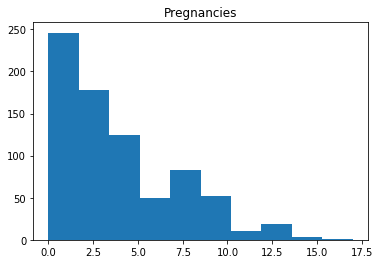

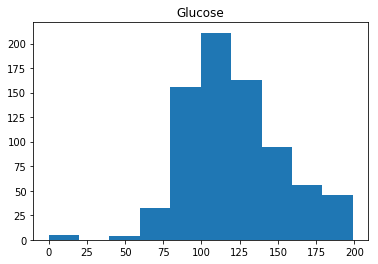

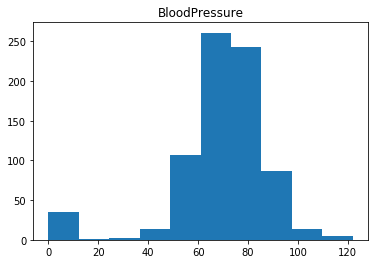

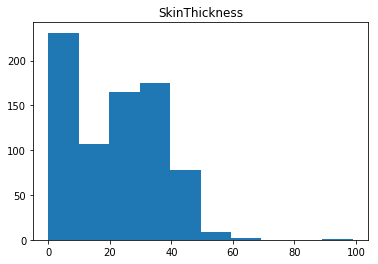

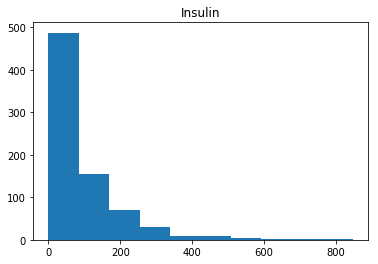

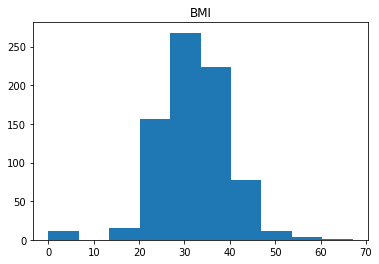

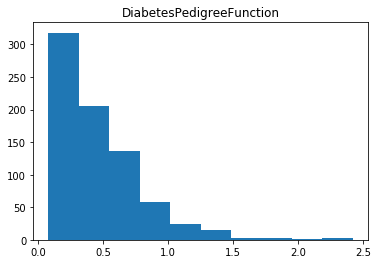

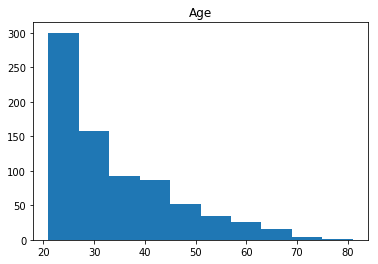

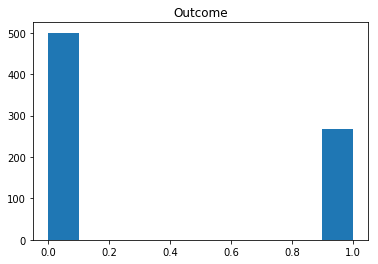

In [3]:
# Task 2
import numpy as np
import os
import matplotlib.pyplot as plt

names = data.dtype.names
for x in range(0, len(data.dtype.names)):
    xd = data_x[:, x]
    plt.scatter(xd, y_data)
    plt.hist(data[names[x]])
    plt.title(names[x])
    plt.show()

## Task 3: Building a Classifier (10 minutes)

A) One of the most important tasks when building models is dividing data into training  and testing sets. Care must be taken to ensure the training and testing portions are representative of the entire data set. You can do this manually as you did in class or use the following function, we will use the function moving forward.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, test_size=0.25, random_state=0)
```
B) Build a logistic regression classifier and fit your training data to the classifier. Here is the Logistic Regression documentation: [sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Something like this may help you get started:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1],
													test_size=0.25, random_state=0)

logistic_reg_model = LogisticRegression(random_state = 0).fit(x_train, y_train)

```

Please discuss the random_state argument in both the train_test_split and the LogisticRegression functions. Here is some documentation that will be useful to that discussion. [random state](https://scikit-learn.org/stable/glossary.html#term-random-state) 

In [5]:
# Task 3

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data_x
Y = data_y


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

logistic_reg_model = LogisticRegression(random_state = 0).fit(x_train, y_train)

## Task 4: Evaluating Model Performance (15 minutes) 

A) Use the test data to make predictions and calculate the performance metrics covered in Lecture 5 for evaluating performance of a model. Use the function that you developed in class to calculate TP,TN, FP and FN.

```python
def assess_Boolean_model( model , test_data, truth_values ):
	TP = 0; FP = 0; 
	TN = 0; FN = 0; 
	for n in range( 0, len(truth_values) ) : 
		sample = test_data[n,:]; 
		if sample.shape[0] == 1:    # sklearn wants a 2D matrix here 
			sample = sample.reshape(-1,1);
		if len( sample.shape ) == 1: # sklearn wants a 2D matrix here 
			sample = sample.reshape(1,-1);
		model_prediction = model.predict( sample ); 
		if	 model_prediction == truth_values[n] and model_prediction == True: 
			TP += 1; 
		if	 model_prediction == truth_values[n] and model_prediction == False: 
			TN += 1; 
		if	 model_prediction != truth_values[n] and model_prediction == True: 
			FP += 1; 
		if	 model_prediction != truth_values[n] and model_prediction == False: 
			FN += 1; 
	return TP, TN, FP, FN;
```
Calculate values for the following performance metrics.

1)	accuracy

 $accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

2)	precision 

$precision = \frac{TP}{TP + FP}$

3)	recall 

$recall = \frac{TP}{TP + FN}$

4)	F1-score

$F_1 = \frac{2 * TP}{2*TP + FP + FN}$

This information can also be found in the lecture 5-6 material [lecture 5-6](https://iu.instructure.com/courses/1908787/pages/221-lectures)

B) Create a confusion matrix and discuss what it represents. 

```python
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)
```

In [ ]:
# Task 4

# defintition from lecture 5/6 

def assess_Boolean_model( model , test_data, truth_values ):
    TP = 0; FP = 0; 
    TN = 0; FN = 0; 
    for n in range( 0, len(truth_values) ) : 
        sample = test_data[n,:]; 
        if sample.shape[0] == 1:    # sklearn wants a 2D matrix here 
            sample = sample.reshape(-1,1);
        if len( sample.shape ) == 1: # sklearn wants a 2D matrix here 
            sample = sample.reshape(1,-1);
        model_prediction = model.predict( sample ); 
        if   model_prediction == truth_values[n] and model_prediction == True: 
            TP += 1; 
        if   model_prediction == truth_values[n] and model_prediction == False: 
            TN += 1; 
        if   model_prediction != truth_values[n] and model_prediction == True: 
            FP += 1; 
        if   model_prediction != truth_values[n] and model_prediction == False: 
            FN += 1; 
    return TP, TN, FP, FN;

# Here we have the four values for true and false positives and negatives needed
# to calculate performance metrics 

[TP,TN,FP,FN] = assess_Boolean_model(logistic_reg_model, x_test,y_test)

def model_performance(TP, TN, FP, FN):
    accuracy = (TP+TN) / (TP + FN + TN + FN)
    precision = (TP/ (TP + FP))
    sensitivity = TP / (TP + FN)
    f1 = (2*TP)/(2*TP + FP + FN)
    
    return accuracy, precision, sensitivity, f1

# Use the model_performance def

model_performance(TP,TN,FP,FN)

In [ ]:
# The confusion matrix
from sklearn.metrics import confusion_matrix

x_test.shape
y_pred = logistic_reg_model.predict(x_test)

confusion_matrix(y_test, y_pred)


## Task 5: Try another classifier (15 minutes)

Repeat task 3 and task 4 with an SVM clasiifier. Here is the sklearn documentation for the SVM.SVC function. [sklearn SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)  Compare the results of both classifiers using the metrics from Task 4.

In [ ]:
# Task 5
from sklearn.svm import SVC

my_svm_classifier = SVC(kernel = 'linear', gamma='auto').fit(x_train,y_train)

[TP,TN,FP,FN] = assess_Boolean_model(my_svm_classifier, x_test,y_test)

model_performance(TP,TN,FP,FN)